In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Cabin' ]
X = df[features]
gender_dict = {'male':1, 'female':2}
X['Sex'].replace(gender_dict, inplace = True)
X['Cabin_Block'] = X['Cabin'].str.slice(0,1)
X['Cabin_Block'] = X['Cabin_Block'].fillna('X', inplace = False)
block_dict = {'X': 0, 'C' : 1, 'E' : 2, 'G': 3, 'D' : 4, 'A' : 5, 'B': 6, 'F': 7, 'T': 8}
X['Cabin_Block'].replace(block_dict, inplace = True)
X.drop('Cabin', axis =1, inplace = True)
X = X.fillna(X.mean())
X.isnull().sum()

/var/folders/cr/8prlvf3s72s0svfyz60fww1m0000gn/T/ipykernel_35544/3699482097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cabin_Block'] = X['Cabin'].str.slice(0,1)
/var/folders/cr/8prlvf3s72s0svfyz60fww1m0000gn/T/ipykernel_35544/3699482097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cabin_Block'] = X['Cabin_Block'].fillna('X', inplace = False)


Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Cabin_Block    0
dtype: int64

In [40]:
X = StandardScaler().fit_transform(X)

array([[ 8.27377244e-01, -7.37695132e-01, -5.92480600e-01,
         4.32793366e-01, -4.73673609e-01, -4.47294466e-01],
       [-1.56610693e+00,  1.35557354e+00,  6.38789012e-01,
         4.32793366e-01, -4.73673609e-01,  1.03935643e-01],
       [ 8.27377244e-01,  1.35557354e+00, -2.84663197e-01,
        -4.74545196e-01, -4.73673609e-01, -4.47294466e-01],
       ...,
       [ 8.27377244e-01,  1.35557354e+00, -1.91391983e-16,
         4.32793366e-01,  2.00893337e+00, -4.47294466e-01],
       [-1.56610693e+00, -7.37695132e-01, -2.84663197e-01,
        -4.74545196e-01, -4.73673609e-01,  1.03935643e-01],
       [ 8.27377244e-01, -7.37695132e-01,  1.77062908e-01,
        -4.74545196e-01, -4.73673609e-01, -4.47294466e-01]])

In [59]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principalDFs = pd.DataFrame(data = principal_components, columns = ['C1','C2'])
pca_df = pd.concat([principalDFs,df['Survived']], axis =1)

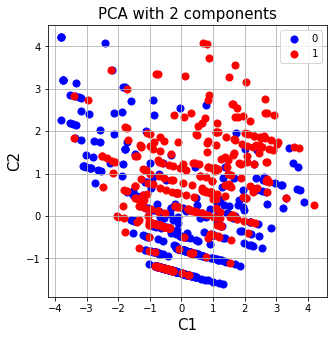

In [61]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
#ax.set_zlabel('C3', fontsize = 15)
ax.set_title('PCA with 2 components', fontsize = 15)
targets = [0, 1]
colors = ['b','r']
for target, color in zip(targets, colors):
    indices_to_keep = df['Survived'] == target
    ax.scatter(pow(pca_df.loc[indices_to_keep,'C1'],1), pow(pca_df.loc[indices_to_keep,'C2'],1), c = color, s = 50)
ax.legend(targets)
ax.grid()
